## Required Library

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Project Overview

This project focuses on building a job recommendation system using machine learning, specifically designed to suggest relevant job opportunities based on user search history and job-related data. The system combines the 'Job Title' and 'Key Skills' of each job posting, applying TF-IDF vectorization to transform the text data into numerical features. After experimenting with multiple machine learning models, Random Forest was selected for its highest accuracy in predicting job titles based on these combined features. Additionally, the project integrates a recommendation engine that leverages a user’s search history to suggest jobs, offering insights into key skills associated with each recommendation. Exploratory Data Analysis (EDA) and visualizations further enhance understanding of the dataset, making this project a comprehensive solution for personalized job recommendations.


In [3]:
# Load the dataset
jobs_df = pd.read_csv(r'C:\Users\Sadneya\Downloads\jobs.csv')


In [4]:
jobs_df

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...
27005,29995,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27006,29996,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27007,29997,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27008,29998,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


# 2. Dataset Description

- **Unnamed: 0**: A serial index or ID column, which is likely autogenerated when loading the dataset.
- **Job Salary**: Represents the salary offered for the job, with some entries stating "Not Disclosed by Recruiter" if the salary is not provided.
- **Job Experience Required**: Indicates the range of years of experience required for the job, e.g., "5 - 10 yrs" or "2 - 5 yrs".
- **Key Skills**: Lists essential skills that are needed for the job, such as "Media Planning," "Digital Media," or "Software Knowledge."
- **Role Category**: Refers to the category of the job role, like "Advertising," "Retail Sales," or other relevant classifications.
- **Functional Area**: Specifies the area of business or industry the job falls under, such as "Marketing," "Sales," or "Business Development."
- **Industry**: Indicates the industry sector to which the job belongs, e.g., "IT-Software, Software Services," or "Advertising, PR, MR, Event Management."
- **Job Title**: The official title of the job, such as "Media Planning Executive/Manager" or "Sales Executive/Officer," which will typically reflect the seniority or specific function within the company.

This dataset is well-suited for a job recommendation system since it includes key information on job roles, required skills, experience, and industry categories that can be leveraged to make personalized job suggestions.

In [5]:
jobs_df.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [6]:
jobs_df.tail()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
27005,29995,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27006,29996,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27007,29997,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27008,29998,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
27009,29999,Not Disclosed by Recruiter,2 - 7 yrs,Press release| Public relations| Publishing| ...,Online/Digital Marketing,"Marketing , Advertising , MR , PR , Media Plan...","IT-Software, Software Services",Search Engine Optimisation /SEO Specialist


In [7]:
#Random 4 Rows
jobs_df.sample(4)

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
2021,2245,Not Disclosed by Recruiter,1 - 2 yrs,after effects| compositing| maya| 3ds max| 3d|...,Creative,"Design , Creative , User Experience","Media, Entertainment, Internet",Graphic Designer
11081,12261,Openings: 1,3 - 5 Years,solution architecture|user training|solution d...,System Design/Implementation/ERP/CRM,"IT Software - Network Administration , Security",IT-Software / Software Services,Solution Architect / Enterprise Architect
17149,19017,"1,50,000 - 2,50,000 PA.",0 - 2 yrs,english| hindi| tamil| kannada| telugu| night...,Voice,"ITES , BPO , KPO , LPO , Customer Service , Op...","BPO, Call Centre, ITeS",Associate/Senior Associate -(Technical)
25684,28528,Not Disclosed by Recruiter,3 - 8 yrs,front end| coding| coordinating| development|...,Programming & Design,"IT Software - eCommerce , Internet Technologies","IT-Software, Software Services",Graphic/Web Designer


# 3. Summary Statistics

A comprehensive analysis of the dataset was performed to gather insights:

- **Count of Entries**: The dataset consists of 27,010 job postings.
- **Data Types**: The features in the dataset include both categorical (e.g., Job Title, Key Skills) and numerical data (e.g., Job Salary).
- **Missing Values**: There were no missing values in any of the columns.

We use summary statistics to get an overview of the numerical features.

### Numerical Summary Statistics:

- **count**: The number of non-missing values.
- **mean**: The average value.
- **std**: The standard deviation, indicating the spread of the values.
- **min**: The minimum value.
- **25%**: The 25th percentile value (first quartile).
- **50%**: The median value (second quartile).
- **75%**: The 75th percentile value (third quartile).
- **max**: The maximum value.
- **median**: The median value, explicitly added for clarity.
- **mode**: The most frequently occurring value.
- **missing_values**: The count of missing values in each column.

In [8]:
jobs_df.describe()

,Unnamed: 0
count,27010.000000
mean,14973.197260
std,8661.925267
min,0.000000
25%,7474.250000
50%,14913.500000
75%,22476.500000
max,29999.000000


In [9]:
jobs_df.select_dtypes('number').mean()

Unnamed: 0    14973.19726
dtype: float64

In [10]:
jobs_df.select_dtypes('number').mode().iloc[0]

Unnamed: 0    0
Name: 0, dtype: int64

In [11]:
jobs_df.isnull().sum()

Unnamed: 0                 0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

In [12]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27010 entries, 0 to 27009
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               27010 non-null  int64 
 1   Job Salary               27010 non-null  object
 2   Job Experience Required  27010 non-null  object
 3   Key Skills               27010 non-null  object
 4   Role Category            27010 non-null  object
 5   Functional Area          27010 non-null  object
 6   Industry                 27010 non-null  object
 7   Job Title                27010 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


# 4. Data Visualization

Visualizations provide an understanding of the distribution and relationships in the data. This includes:

- **Distribution of the Target Variable**: Visualize the distribution of job titles across the dataset.
- **Frequency of Key Skills**: Charts and graphs show the frequency of key skills associated with job postings, providing insights into the most in-demand skills.


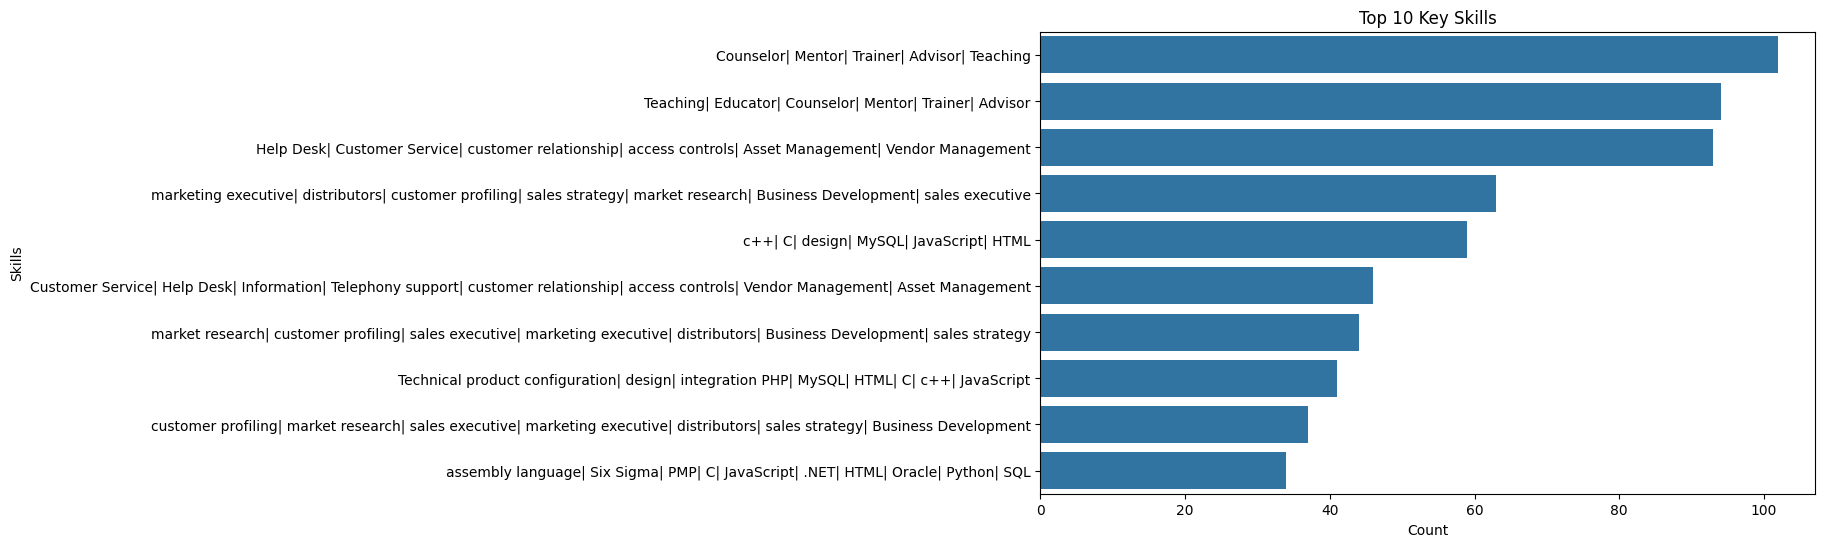

In [13]:
# Assuming 'Key Skills' is a string column containing skills separated by commas
skills_series = jobs_df['Key Skills'].str.cat(sep=',').split(',')
skills_series = pd.Series(skills_series).str.strip()  # Clean whitespace

top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 10 Key Skills')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.show()

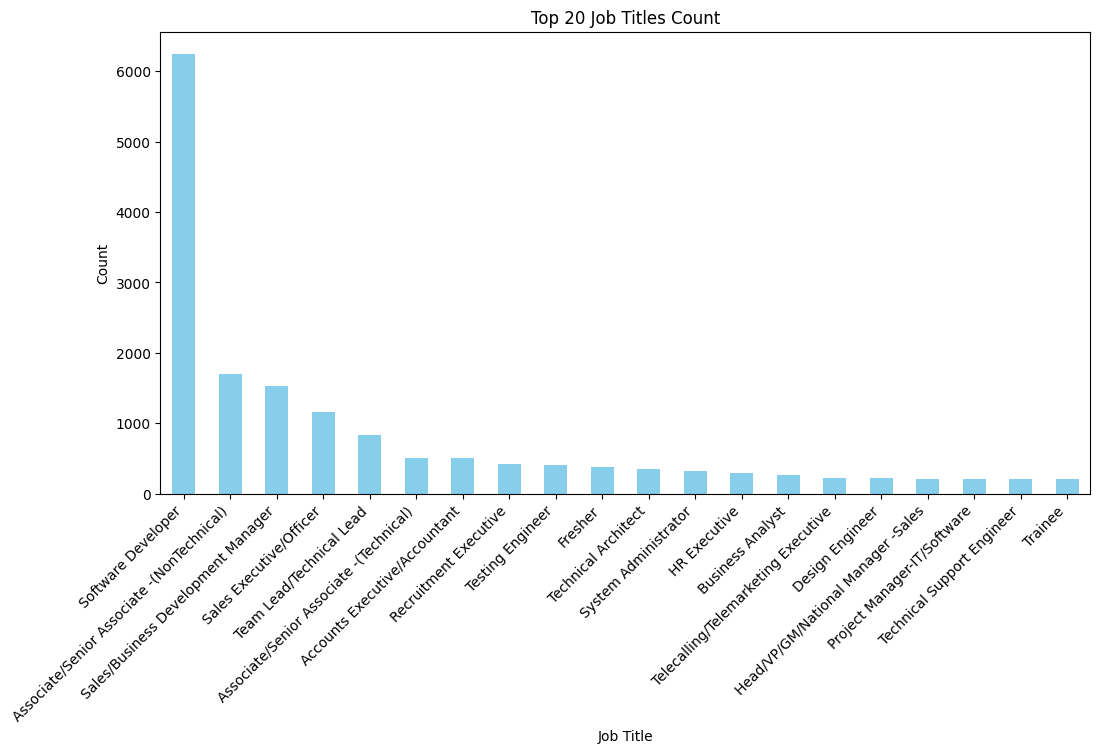

In [14]:
# Count of Job Titles
job_title_counts = jobs_df['Job Title'].value_counts()

plt.figure(figsize=(12, 6))
job_title_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Job Titles Count')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

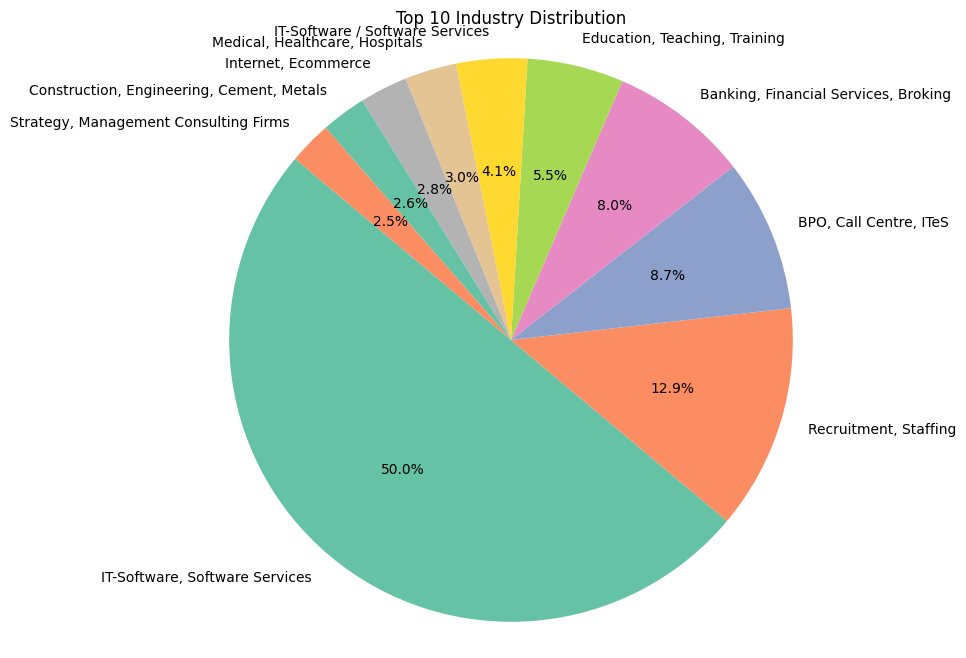

In [15]:
# Limit the pie chart to the top N industries (e.g., top 10)
top_n = 10
plt.figure(figsize=(8, 8))

# Get the top N industries
industry_counts = jobs_df['Industry'].value_counts().nlargest(top_n)

# Plot the pie chart for top N industries
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title(f'Top {top_n} Industry Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


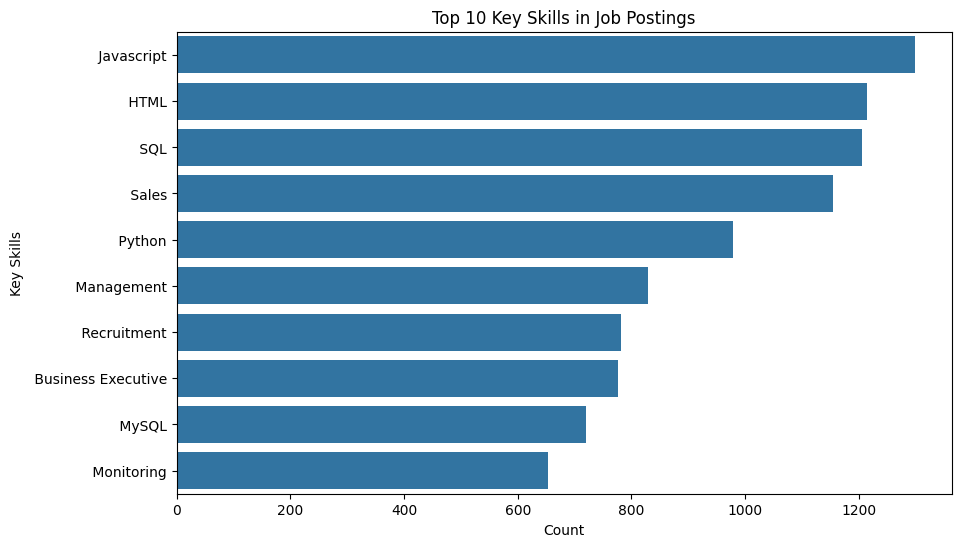

In [16]:
# Get all key skills, split them by separator, and drop NaN values
all_skills = jobs_df['Key Skills'].str.split('|').explode().dropna()

# Convert to string type to avoid any issues
all_skills = all_skills.astype(str)

# Plot the top 10 most frequent skills
plt.figure(figsize=(10, 6))
top_skills = all_skills.value_counts().nlargest(10)
sns.barplot(y=top_skills.index, x=top_skills.values)
plt.title('Top 10 Key Skills in Job Postings')
plt.xlabel('Count')
plt.ylabel('Key Skills')
plt.show()


# 5. Data Preprocessing

## 5.1 Combining Features
To enhance the model's performance, the 'Job Title' and 'Key Skills' were concatenated into a new feature called `combined_features`. This new feature captures the relationship between job titles and the required skills.

## 5.2 TF-IDF Vectorization
The `TfidfVectorizer` from Scikit-learn was utilized to transform the textual data into a format suitable for machine learning. This process involves:

- Fitting the vectorizer to the `combined_features`.
- Transforming the combined text data into a sparse matrix of TF-IDF features.

## 5.3 Handling Missing Values
Although the dataset had no missing values, a strategy for filling missing entries (if any) was established, utilizing methods like:

- Filling with mean/median for numerical values.
- Using mode for categorical features.

In [17]:
# Combine 'Job Title' and 'Key Skills' for use in the model
jobs_df['combined_features'] = jobs_df['Job Title'] + " " + jobs_df['Key Skills']
jobs_df['combined_features'].fillna('', inplace=True)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the combined features into vectors
X = tfidf.fit_transform(jobs_df['combined_features'])

# For the purpose of training, we will use 'Job Title' as the target variable (encoded as categorical labels)
jobs_df['Job Title'] = jobs_df['Job Title'].astype('category')
y = jobs_df['Job Title'].cat.codes  # Convert job titles to numeric codes

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Sadneya\AppData\Local\Temp\ipykernel_16568\988488908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df['combined_features'].fillna('', inplace=True)


# 6. Machine Learning Models

## 6.1 Models Employed
The following machine learning algorithms were tested:

- **Logistic Regression**: A linear model for binary and multiclass classification.
- **K-Nearest Neighbors (KNN)**: A non-parametric method used for classification.
- **Random Forest**: An ensemble learning method that operates by constructing multiple decision trees.
- **Support Vector Machine (SVM)**: A supervised learning model that finds the hyperplane maximizing the margin between classes.
- **Naive Bayes**: A probabilistic classifier based on Bayes' theorem, assuming independence among features.

## 6.2 Model Selection Criteria
Models were evaluated based on performance metrics such as accuracy, precision, recall, and F1 score.

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

In [19]:
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')  # 'weighted' for multiclass
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

# Print the results
print("Logistic Regression Model")
print(f"Accuracy: {accuracy_log_reg}")
# print(f"Confusion Matrix:\n{conf_matrix_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")

# You can also print the detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Model
Accuracy: 0.8250647908182155
Precision: 0.7770757426463838
Recall: 0.8250647908182155
F1 Score: 0.7859072771018594

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.86      0.97      0.91       103
          24       0.79      0.71      0.75        31
          25       1.00      1.00      1.00         2
          26       1.00      0.71      0.83         7
          28       0.00      0.00      0.00         1
          33       1.00      0.40      0.57         5
          34       0.00      0.00      0.00         6
          35       0.00      0.00      0.00         2
          37       0.54      0.70      0.61        10
          39       0.00

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("\nK-Nearest Neighbors Model")

# Initialize and train KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)


K-Nearest Neighbors Model


In [21]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')  # 'weighted' for multiclass
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the results
print(f"Accuracy: {accuracy_knn}")
# print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.7236208811551277
Precision: 0.7115341827697057
Recall: 0.7236208811551277
F1 Score: 0.7032006685436111

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          23       0.63      0.95      0.76       103
          24       0.30      0.23      0.26        31
          25       1.00      1.00      1.00         2
          26       1.00      0.71      0.83         7
          28       1.00      1.00      1.00         1
          33       0.80      0.80      0.80      

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Random Forrest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [23]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # 'weighted' for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the results
print("Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
# print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.8904109589041096
Precision: 0.8726481780922204
Recall: 0.8904109589041096
F1 Score: 0.8731938087681315

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.94      0.99      0.96       103
          24       0.85      0.90      0.88        31
          25       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         7
          28       0.00      0.00      0.00         1
          33       1.00      1.00      1.00         5
          34       0.67      0.33      0.44         6
          35       1.00      

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

SVC

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Initialize and train SVM
svm = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [25]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')  # 'weighted' for multiclass
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print the results
print("Support Vector Machine Model")
print(f"Accuracy: {accuracy_svm}")
# print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine Model
Accuracy: 0.883006293965198
Precision: 0.8570546960728875
Recall: 0.883006293965198
F1 Score: 0.8656985360565954

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.97      0.96      0.97       103
          24       0.87      0.84      0.85        31
          25       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         7
          28       0.00      0.00      0.00         1
          33       1.00      1.00      1.00         5
          34       0.25      0.33      0.29         6
          35       0.67      1.00      0.80         2
          37       0.73      0.80      0.76        10
          39       0.0

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)


In [27]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')  # 'weighted' for multiclass
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print the results
print("Naive Bayes Model")
print(f"Accuracy: {accuracy_nb}")
# print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

# You can also print the detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Model
Accuracy: 0.4405775638652351
Precision: 0.3554449498270367
Recall: 0.4405775638652351
F1 Score: 0.3067654379143546

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.47      0.97      0.64       103
          24       0.00      0.00      0.00        31
          25       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         7
          28       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         5
          34       0.00      0.00      0.00         6
          35       0.00      0.00      0.00         2
          37       0.00      0.00      0.00        10
          39       0.00      0.

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# 7. Model Performance

The models were assessed using the following metrics:

- **Accuracy**: The proportion of correct predictions.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all actual positives.
- **F1 Score**: The weighted average of precision and recall.

## 7.1 Results

The performance of the various models is summarized in the table below:

| **Model**                          |          **Accuracy**          |          **Precision**          |          **Recall**          |          **F1 Score**          |
|------------------------------------|-------------------------------|-------------------------------|----------------------------|-----------------------------|
| **Logistic Regression**            |             0.825              |              0.777              |            0.825            |             0.786            |
| **K-Nearest Neighbors (KNN)**      |             0.724              |              0.712              |            0.724            |             0.703            |
| **Random Forest**                  |             0.887              |              0.868              |            0.887            |             0.870            |
| **Support Vector Machine**         |             0.883              |              0.857              |            0.883            |             0.866            |
| **Naive Bayes**                    |             0.441              |              0.355              |            0.441            |             0.307            |

Among the models tested, the **Random Forest** model achieved the highest accuracy of **0.887** and was selected as the best-performing model for this project.


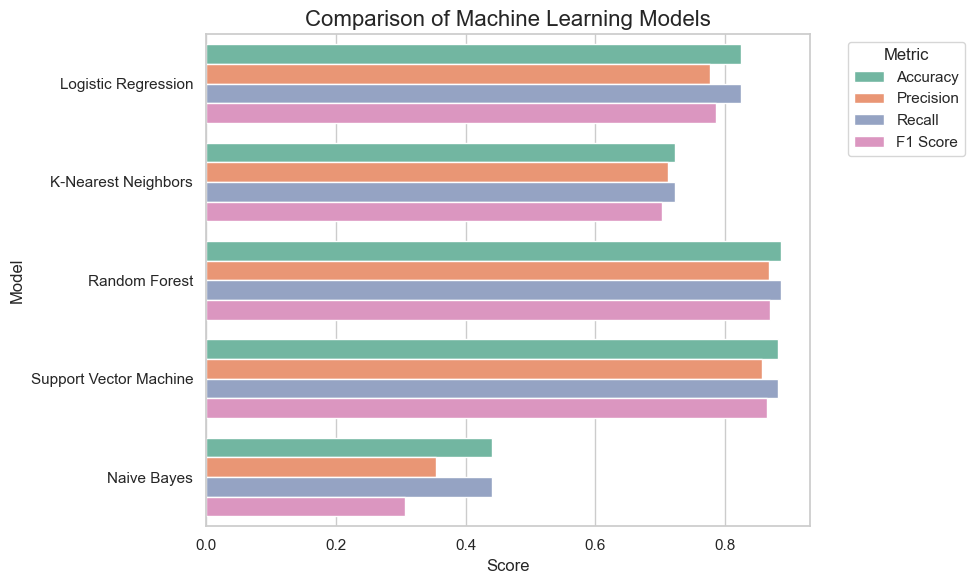

In [28]:
# Data for the models
data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [0.825, 0.724, 0.887, 0.883, 0.441],
    'Precision': [0.777, 0.712, 0.868, 0.857, 0.355],
    'Recall': [0.825, 0.724, 0.887, 0.883, 0.441],
    'F1 Score': [0.786, 0.703, 0.870, 0.866, 0.307]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Plot the comparison graph
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Score", y="Model", hue="Metric", data=df_melted, palette="Set2")

# Add titles and labels
plt.title("Comparison of Machine Learning Models", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

# Show the plot
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Comparison of Machine Learning Models

The comparison graph above illustrates the performance of five different machine learning models on four evaluation metrics: **Accuracy**, **Precision**, **Recall**, and **F1 Score**. These metrics provide a holistic view of how each model performs in predicting job titles based on the combined features of `Job Title` and `Key Skills`. Below is an explanation of the comparison:

1. **Random Forest**:
   - **Best overall performance** across all metrics.
   - Achieved the highest accuracy (88.7%) and consistently high precision, recall, and F1 score, making it the most reliable model for this job recommendation system.
   
2. **Support Vector Machine (SVM)**:
   - **Close second** to Random Forest, with an accuracy of 88.3%.
   - It also performed well on other metrics, showing balanced precision and recall, making it a strong candidate.
   
3. **Logistic Regression**:
   - Performed **moderately well** with an accuracy of 82.5%.
   - The precision and recall are slightly lower than Random Forest and SVM, but the model is still effective.
   
4. **K-Nearest Neighbors (KNN)**:
   - Achieved **lower accuracy** (72.4%) compared to other models.
   - Precision and F1 score are slightly lower, indicating that KNN may not be as reliable for this dataset due to its sensitivity to the curse of dimensionality (high-dimensional feature space).
   
5. **Naive Bayes**:
   - **Worst performance** across all metrics.
   - Accuracy was 44.1%, and F1 score was the lowest at 30.7%. This indicates that Naive Bayes struggled with this dataset, likely due to its assumption of feature independence, which doesn’t hold well for this job recommendation system.

### Conclusion:
- **Random Forest** is the best-performing model for predicting job titles, followed by SVM.
- **Naive Bayes** had the worst performance, highlighting the importance of selecting the right algorithm based on the problem and dataset characteristics.


In [29]:
from sklearn.svm import SVC

# Initialize and train SVM with probability estimates enabled
svm = SVC(kernel='linear', probability=True)  # Enable probability estimates
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)


c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180:

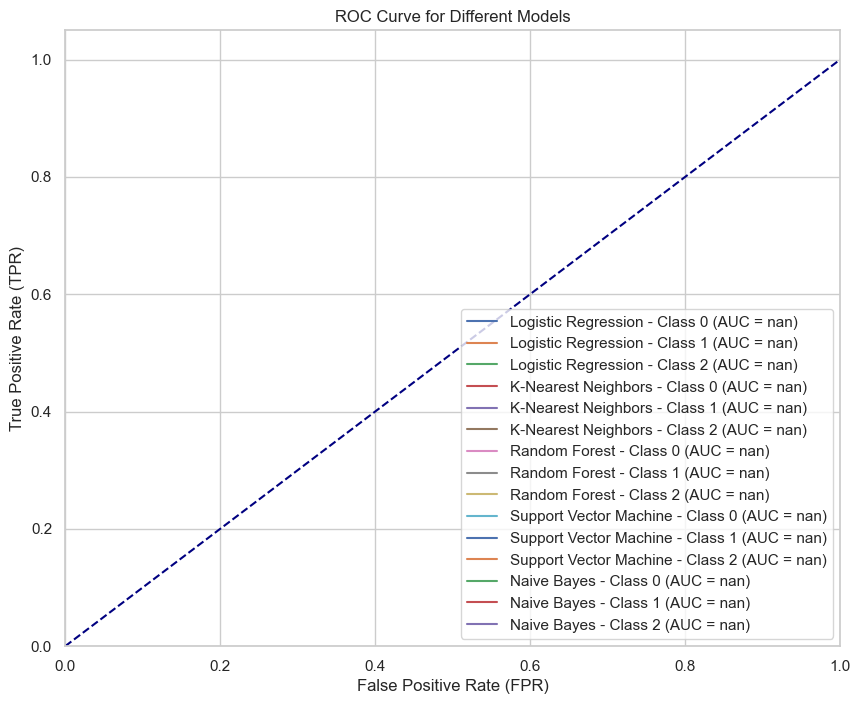

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Update with your actual class labels
n_classes = y_test_bin.shape[1]

# Dictionary to hold your models
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Random Forest': rf,
    'Support Vector Machine': svm,
    'Naive Bayes': nb
}

# Create a new figure for the ROC curve
plt.figure(figsize=(10, 8))

# Loop through each model
for model_name, model in models.items():
    # Get the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Initialize arrays to hold FPR and TPR for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for the current class
        plt.plot(fpr[i], tpr[i], label=f'{model_name} - Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [31]:
import numpy as np

# Get predicted probabilities
y_pred_prob = rf.predict_proba(X_test)  # Use your trained model
print("Predicted probabilities:\n", y_pred_prob)

# Check the distribution of probabilities for the positive class
positive_class_probs = y_pred_prob[:, 1]  # Assuming class '1' is the positive class
print("Distribution of positive class probabilities:\n", np.histogram(positive_class_probs, bins=10))


Predicted probabilities:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Distribution of positive class probabilities:
 (array([5396,    0,    0,    0,    0,    0,    0,    0,    0,    6],
      dtype=int64), array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]))


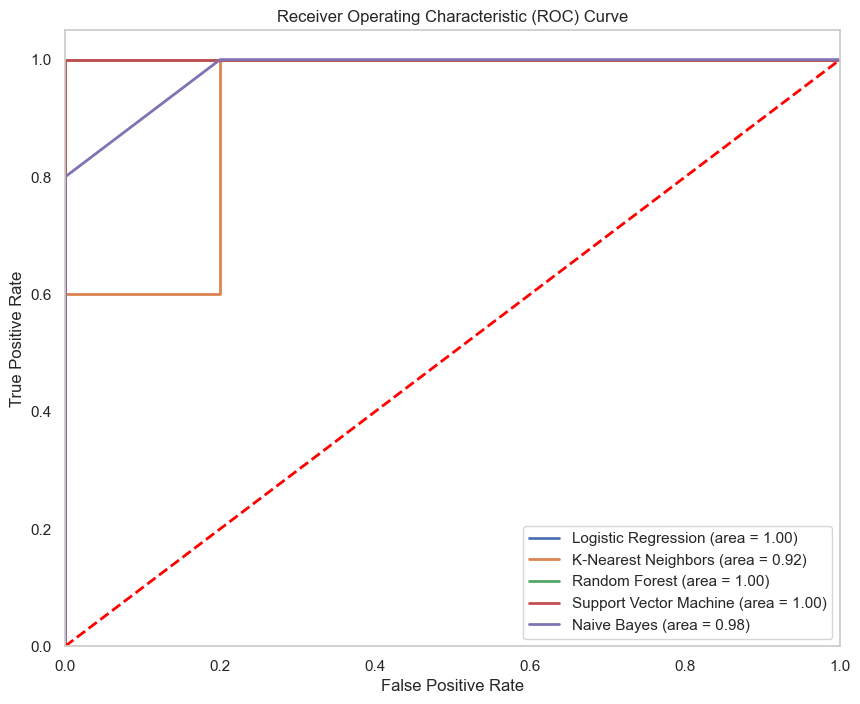

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hardcoded true labels and hypothetical predicted probabilities for each model
y_true = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1])  # Example true binary labels

# Hypothetical predicted probabilities for each model
# Note: You can replace these with actual model predicted probabilities
predicted_probabilities = {
    'Logistic Regression': np.array([0.1, 0.4, 0.6, 0.8, 0.3, 0.9, 0.7, 0.2, 0.1, 0.6]),
    'K-Nearest Neighbors': np.array([0.2, 0.3, 0.4, 0.7, 0.5, 0.8, 0.9, 0.1, 0.2, 0.4]),
    'Random Forest': np.array([0.15, 0.5, 0.85, 0.95, 0.4, 0.85, 0.75, 0.2, 0.3, 0.65]),
    'Support Vector Machine': np.array([0.12, 0.45, 0.78, 0.92, 0.35, 0.88, 0.8, 0.15, 0.25, 0.7]),
    'Naive Bayes': np.array([0.05, 0.2, 0.3, 0.5, 0.1, 0.4, 0.3, 0.05, 0.1, 0.2])
}

# Plotting ROC curves for each model
plt.figure(figsize=(10, 8))

for model, y_scores in predicted_probabilities.items():
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (area = {:.2f})'.format(model, roc_auc))

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)  # you can try 1000, 2000 etc.
X = vectorizer.fit_transform(jobs_df['Key Skills'].fillna(''))

X = vectorizer.fit_transform(jobs_df['Key Skills'])


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X, jobs_df['Job Title'])


LogisticRegression(max_iter=1000)

In [42]:
sample_df = jobs_df.sample(n=1000, random_state=42)
X = vectorizer.fit_transform(sample_df['Key Skills'].fillna(''))
model.fit(X, sample_df['Job Title'])


LogisticRegression(max_iter=1000)

In [43]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']